In [9]:
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy    as np
import pandas   as pd
import os
import nibabel as nib


In [2]:
source_idx=2
target_idx=1

source_test_data=f"/home/matteo/data/NSD/processed_roi/subj0{source_idx}/MNI/nsd_test_fmriavg_nsdgeneral_sub{source_idx}.npy"
source_train_data=f"/home/matteo/data/NSD/processed_roi/subj0{source_idx}/MNI/nsd_train_fmriavg_nsdgeneral_sub{source_idx}.npy"
source_test_imgs=f"/home/matteo/data/NSD/processed_roi/subj0{source_idx}/MNI/nsd_test_stim_sub{source_idx}.npy"

target_test_data=f"/home/matteo/data/NSD/processed_roi/subj0{target_idx}/MNI/nsd_test_fmriavg_nsdgeneral_sub{target_idx}.npy"


In [3]:
source_test=np.load(source_test_data)
source_train=np.load(source_train_data)


target_test=np.load(target_test_data)

## Remove useful indices 
indices=[25,31,68,121,126,318,384,492,531,606,702,860]

indices2=[70,116,165,261,278,363,451,774]
indices3=[41,205,230,411,428,446,502,777]
extra=[95,905]
comparison_indices=indices+indices2+indices3+extra

align_indices=[i for i in  range(len(source_test)) if i not in comparison_indices]

comparison_source=source_test[comparison_indices]

## keep only align indices
source_test=source_test[align_indices]
target_test=target_test[align_indices]

In [4]:
from sklearn.linear_model import RidgeCV


aligner=RidgeCV(alphas=[1e2,1e3,1e4,5e4], fit_intercept=True)
aligner.fit(source_test,target_test)

RidgeCV(alphas=[100.0, 1000.0, 10000.0, 50000.0])

In [5]:
coeff=aligner.coef_

In [7]:
coeff[0]

array([-0.00343222,  0.0098876 , -0.0069585 , ..., -0.00074722,
        0.        ,  0.        ])

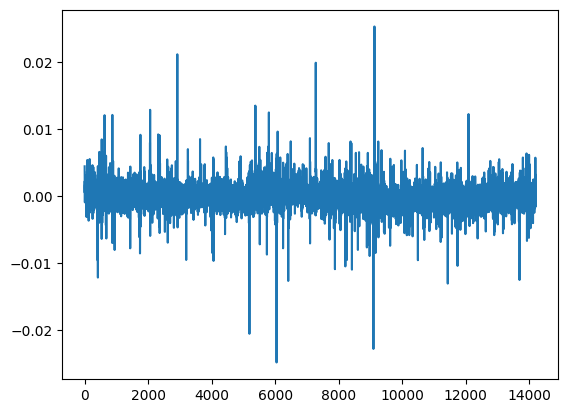

In [21]:
plt.plot(coeff[:,40])